In [24]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
def sigmoid(w,b,x):
    return 1/(1+(np.exp(-(w*x+b))))

(0.0, 1.0)

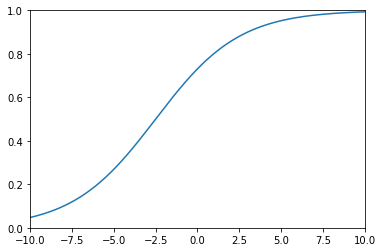

In [129]:

X=np.linspace(-10,10,200)

Y=sigmoid(w,b,X)
plt.plot(X,Y)
plt.xlim(-10,10)
plt.ylim(0,1)

In [34]:
from mpl_toolkits import mplot3d
def sigmoid(w_1,w_2,b,x,y):
    return 1/(1+(np.exp(-((w_1*x)+(w_2*y)+b))))


In [98]:
w_1=0.5
w_2=1
b=1
X=np.linspace(-10,10,200)
Y=np.linspace(-10,10,200)
x,y=np.meshgrid(X,Y)
z=sigmoid(w_1,w_2,b,x,y)


TypeError: sigmoid() takes 3 positional arguments but 5 were given

In [96]:
mcmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

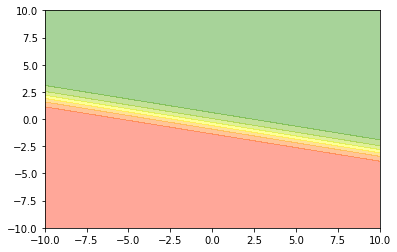

In [100]:
plt.contourf(x,y,z,cmap=mcmap,alpha=0.4)
plt.show()

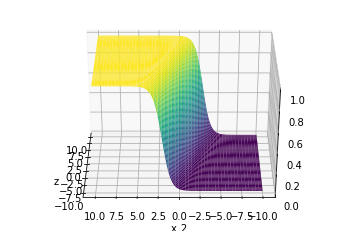

In [49]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z,cmap='viridis')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_xlabel('z')
ax.view_init(30,180)

# ploting loss

In [78]:
w_u = 0.5
b_u=0.25

def sigmoid(w,b,x):
    return 1/(1+(np.exp(-(w*x+b))))

def loss(X,Y,w_est,b_est):
    loss=0
    loss = np.sum((Y-sigmoid(w_est,b_est,X))**2)
    return loss

X=np.random.random(25)*20 -10
Y=sigmoid(w_u,b_u,X)

In [79]:
(Y-sigmoid(0.5,4,X))**2


array([2.57396189e-02, 2.66757450e-02, 3.60150770e-01, 2.79101634e-01,
       5.13703249e-01, 1.87354987e-01, 4.64390256e-01, 2.64681383e-02,
       4.10669256e-01, 8.57113126e-04, 3.53944243e-01, 5.28410416e-01,
       7.68652772e-02, 1.99742113e-01, 4.88896266e-01, 1.86313101e-01,
       5.15159350e-01, 5.33784443e-01, 3.60136339e-01, 9.31755782e-02,
       8.64696490e-04, 2.22444436e-01, 3.26675489e-01, 1.67143489e-03,
       1.14693109e-04])

In [89]:
W = np.linspace(0,6,100)
B = np.linspace(-1,1,100)
wg,bg = np.meshgrid(W,B)


In [90]:
l = np.zeros(wg.shape)


In [91]:
for i in range(wg.shape[0]):
    for j in range(wg.shape[1]):
           l[i,j] = (loss(X,Y,wg[i,j],bg[i,j]))

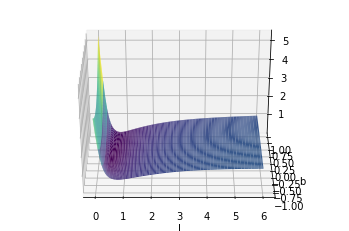

In [93]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(wg,bg,l,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_xlabel('l')
ax.view_init(30,-90)

# Class for sigmoid neuron


In [3]:
class SigmoidNeuron:
    
    def __init__(self):
        self.W = None
        self.B = None
        
    def perceptron(self,X):
        return np.dot(X,(self.W.T))+ self.B
        
    def sigmoid(self,x):
        return (1.0/(1.0+(np.exp(-(x)))))
    
    def grad_w(self,x,y):
        fx = self.sigmoid(self.perceptron(x))
        return (fx-y)*(1-fx)*(fx)*x
    
    def grad_b(self,x,y):
        fx = self.sigmoid(self.perceptron(x))
        return (fx-y)*(1-fx)*(fx)
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=False):
        if initialise:
            self.W = np.random.randn(1,X.shape[1])
            self.B=0
            
        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+= self.grad_w(x,y)
                db+= self.grad_b(x,y)
            self.W -= learning_rate*dw
            self.B -= learning_rate*db
        
    

# Toy Data


In [44]:
import numpy as np
XX=np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y = np.array([1,1,1,0,0,0])


In [45]:
mcmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])
def plot_sn_neuron(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j],X2[i]])
            YY[i,j] = sn.sigmoid(sn.perceptron(val))
        ax.contourf(XX1,XX2,YY,cmap=mcmap,alpha=0.4)
        ax.scatter(X[:,0],X[:,1],c=Y,cmap=mcmap)
        

AttributeError: 'AxesSubplot' object has no attribute 'canvas'

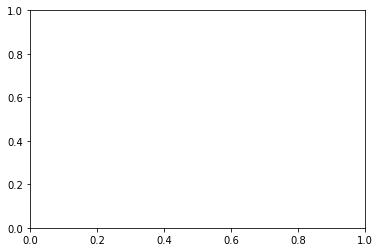

In [51]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.subplot()


ani = animation.FuncAnimation(fig,plot_sn_neuron,interval=5,blit=False)

In [46]:
sn = SigmoidNeuron()

In [47]:
sn.fit(XX,Y,1,0.25,True)

W: [[-0.5691597  -0.44345286]] B: [0.04446065]
W: [[-0.42222744 -0.47719506]] B: [0.09303375]
W: [[-0.24063087 -0.49842975]] B: [0.14847997]
W: [[-0.06266107 -0.50518067]] B: [0.20173935]
W: [[ 0.04853225 -0.49955172]] B: [0.23616882]
W: [[ 0.10523909 -0.49634176]] B: [0.25444295]
W: [[ 0.13516931 -0.49867704]] B: [0.26429031]
W: [[ 0.15219146 -0.50369189]] B: [0.27002423]
W: [[ 0.16266671 -0.50915142]] B: [0.27373479]
W: [[ 0.1695552  -0.51409519]] B: [0.27639749]
W: [[ 0.17430919 -0.51825427]] B: [0.27847624]
W: [[ 0.17769623 -0.52163984]] B: [0.28020374]
W: [[ 0.18015526 -0.52435443]] B: [0.28170493]
W: [[ 0.18195636 -0.52651707]] B: [0.28305185]
W: [[ 0.18327625 -0.52823684]] B: [0.28428891]
W: [[ 0.18423644 -0.52960553]] B: [0.28544512]
W: [[ 0.18492362 -0.53069756]] B: [0.28654041]
W: [[ 0.18540143 -0.53157217]] B: [0.28758896]
W: [[ 0.18571749 -0.53227607]] B: [0.28860116]
W: [[ 0.18590795 -0.53284597]] B: [0.28958479]


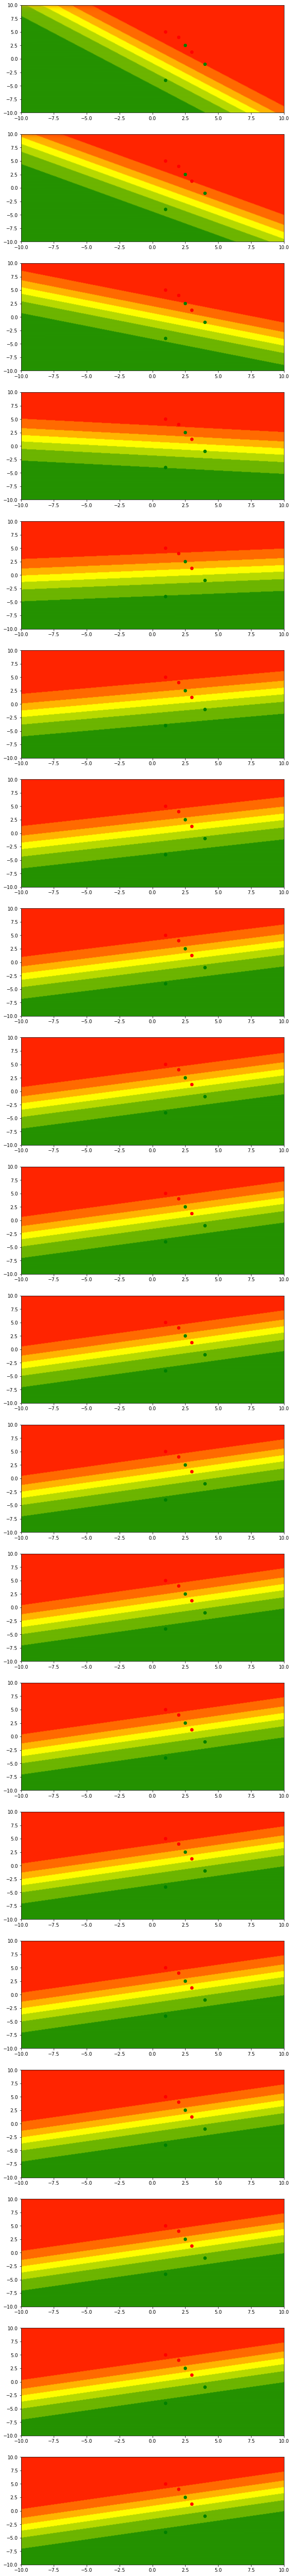

In [48]:

fig= plt.subplot()

epochs=20
plt.figure(figsize=(10,epochs*5))
wi = [ [ ] ]
ba=[]
sn.fit(XX,Y,1,0.25,True)
for i in range(epochs):
    ax=plt.subplot(epochs,1,i+1)
    print('W:',sn.W,'B:',sn.B)
    plot_sn_neuron(XX,Y,sn,ax)
    sn.fit(XX,Y,1,0.25,False)

    
   
 



In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -10,10))
ax.set_ylim((-10, 10))
line, = ax.([], [], lw=2)



In [ ]:
def animate(i):
    ax.clear()
    ax.contourf()
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [ ]:
HTML(anim.to_html5_video())

W: [[ 0.68019638 -0.6382549 ]] B: [-0.07145235]
W: [[ 0.63515962 -0.6500136 ]] B: [-0.0851027]
W: [[ 0.59597433 -0.64972069]] B: [-0.09571665]
W: [[ 0.56049921 -0.64330176]] B: [-0.10454237]
W: [[ 0.52802957 -0.63348727]] B: [-0.11206639]
W: [[ 0.49837703 -0.62180513]] B: [-0.11849548]
W: [[ 0.47153818 -0.60923662]] B: [-0.12392376]
W: [[ 0.44754543 -0.59647446]] B: [-0.12840456]
W: [[ 0.42639391 -0.58403189]] B: [-0.13198432]
W: [[ 0.4080097  -0.57228876]] B: [-0.1347179]
W: [[ 0.39224452 -0.56151128]] B: [-0.13667313]
W: [[ 0.37888736 -0.55186327]] B: [-0.13792922]
W: [[ 0.36768506 -0.54341779]] B: [-0.13857195]
W: [[ 0.358365   -0.53617222]] B: [-0.13868822]
W: [[ 0.35065515 -0.53006634]] B: [-0.1383612]
W: [[ 0.34429893 -0.52500136]] B: [-0.13766702]
W: [[ 0.33906442 -0.52085731]] B: [-0.13667291]
W: [[ 0.33474863 -0.51750731]] B: [-0.13543665]
W: [[ 0.33117832 -0.51482775]] B: [-0.13400684]
W: [[ 0.3282084  -0.51270482]] B: [-0.13242368]


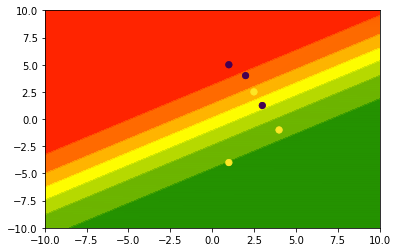

In [35]:

epochs=20
wi = [ [ ] ]
ba=[]
sn.fit(XX,Y,1,0.25,True)
for i in range(epochs):
    sn.fit(XX,Y,1,0.25,False)
    print('W:',sn.W,'B:',sn.B)
    plot_sn_neuron(XX,Y,sn)



IndexError: too many indices for array

In [221]:
x,y=np.meshgrid(XX,Y)



In [220]:
for w,x in zip(W,XX):
    print(w,x)

[[ 0.20263056 -0.53041983]] [2.5 2.5]
[[ 0.20263056 -0.53041983]] [ 4. -1.]
[[ 0.20263056 -0.53041983]] [ 1. -4.]
[[ 0.20263056 -0.53041983]] [3.   1.25]
[[ 0.20263056 -0.53041983]] [2. 4.]
[[ 0.20263056 -0.53041983]] [1. 5.]


In [215]:
dt

(1,)

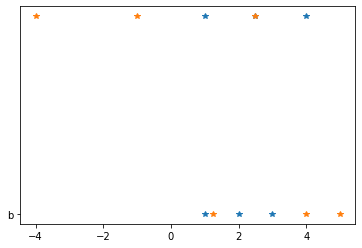

In [178]:
plt.plot(Xx,Y,'*','b')

plt.show()

In [ ]:
mcmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])
plt.contourf(x,y,z,cmap=mcmap,alpha=0.4)
plt.show()

# 